# Data Science for Business - <font color='orange'>PACMANN</font> AI
# <font color='blue'>Credit Default Prediction</font>

# Dataset Information

`SeriousDlqinregression2yrs` Person experienced 90 days past due delinquency or worse

`RevolvingUtilizationOfUnsecuredLines`: Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits

`age`	Age of borrower in years

`NumberOfTime30-59DaysPastDueNotWorse`: Number of times borrower has been 30-59 days past due but no worse in the last 2 years.

`DebtRatio`: Monthly debt payments, alimony,living costs divided by monthy gross income

`MonthlyIncome`: Monthly income

`NumberOfOpenCreditLinesAndLoans`: Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards)

`NumberOfTimes90DaysLate`: Number of times borrower has been 90 days or more past due.

`NumberRealEstateLoansOrLines`: Number of mortgage and real estate loans including home equity lines of credit

`NumberOfTime60-89DaysPastDueNotWorse`: Number of times borrower has been 60-89 days past due but no worse in the last 2 years.

`NumberOfDependents`: Number of dependents in family excluding themselves (spouse, children etc.)

`DependentClass`: Class of ‘NumberOfDependents’

# Workflow ::
### 1. Import Library
* numpy 
* pandas 
* joblib

### 2. Import Dataset (importData)
* Load Data
* Check Shape
* Drop Duplicates
* Drop irrelevant column

### 3. Split Input-Output (extractInputOutput)
* data = data_input + data_output <br>
* data_input = data - data_output

### 4. Split Numerical & Categorical (splitNumCat)
* data_input = data_numerical + data_categorical <br>
* data_categorical = data - data_numerical


### 5. Data Imputation
* Numerical   :: fitImputNum + transformNumerical
* Categorical :: fillna("KOSONG")

### 6. Plotting

### <font color='blue'>  >> Feature Engineering </font>
* Outlier Handling
* Log Transform
* Square Feature

### 7. Numerical Standardizing (fitStandardize + transformNumerical)
### 8. Categorical Dummy ( pd.get_dummies() )
### 9. Join to data_train_clean
### 10. Modelling with Machine Learning

### <font color='blue'>  >> Feature Selection </font>
* L1 Regularization
* Backward Elimination

### <font color='blue'>  >> Modelling with selected feature </font>
### <font color='blue'>  >> Model Diagnosis </font>




### x. preprocessTest

## Import Library

In [1]:
import numpy as np
# import library pandas
import pandas as pd
# import library untuk save object
from sklearn.externals import joblib

# Import Dataset

In [2]:
# load data credit_default.csv
data = pd.read_csv("credit_default.csv")

In [3]:
# menampilkan observasi teratas
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,DependentsClass
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0,0-4
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0,0-4
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0,0-4
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0,0-4
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0,0-4


## Value Counts and Proportion

In [4]:
# cek proporsi kolom output
data["SeriousDlqin2yrs"].value_counts(normalize=True)

0    0.93316
1    0.06684
Name: SeriousDlqin2yrs, dtype: float64

# <font color = 'blue'> FUNCTION: importData

In [5]:
def importData(filepath, sep=',', drop=[]):
    '''
    Import data CSV ke dalam bentuk DataFrame
    
    Parameter
    ----------
    filepath : str,
        lokasi file data
    sep : str, default ','
        karakter pemisah pada data
    drop : list, default []
        list nama kolom untuk didrop
        
    Output
    -------
    data : DataFrame
    
    '''
     
    data = pd.read_csv(filepath, sep=sep)
    data = data.drop(drop,axis=1)   
    print("Banyaknya data", data.shape)

    print("Banyaknya data duplicate", data.duplicated().sum())

    data = data.drop_duplicates()
    
    print("Banyaknya data setelah di drop", data.shape)
    return data

In [6]:
# cek dokumentasi dari fungsi importData
importData?

In [7]:
data = importData('credit_default.csv',sep=',', drop=[])

Banyaknya data (150000, 12)
Banyaknya data duplicate 609
Banyaknya data setelah di drop (149391, 12)


# Split Input-Output

In [8]:
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,DependentsClass
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0,0-4
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0,0-4
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0,0-4
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0,0-4
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0,0-4


data = data_input + data_output <br>
data_input = data - data_output

# <font color = 'blue'> FUNCTION: extractInputOutput

In [9]:
def extractInputOutput(data, output_col):
    '''
    Fungsi untuk memisahkan antara kolom data input dan output
    
    Parameter
    ----------
    data : DataFrame, 
        data yang hendak dipisahkan input-outputnya
    output_col : str, 
        kolom data output
        
    Output
    -------
    data_input  : DataFrame     
    data_output : DataFrame
    
    '''
    
    data_output = data[output_col]
    data_input = data.drop(output_col, axis=1)

    return data_input, data_output

In [10]:
extractInputOutput?

In [11]:
x, y = extractInputOutput(data, 'SeriousDlqin2yrs')

In [12]:
x.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,DependentsClass
0,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0,0-4
1,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0,0-4
2,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0,0-4
3,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0,0-4
4,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0,0-4


In [13]:
y.head()

0    1
1    0
2    0
3    0
4    0
Name: SeriousDlqin2yrs, dtype: int64

In [14]:
# save column input
joblib.dump(x.columns, 'input_col.pkl')

['input_col.pkl']

# Train Test Split

<img src="img/train_test_split.png",width=1250, align="middle">

In [15]:
# import library train_test_split
from sklearn.model_selection import train_test_split

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size = 0.25, 
                                                    random_state=123)

In [17]:
print(x_train.shape, y_train.shape)
print(x_test.shape,  y_test.shape)

(112043, 11) (112043,)
(37348, 11) (37348,)


# Missing Data

## Checking Missing Data

In [18]:
# cek missing data dari x_train
x_train.isnull().sum()

RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           21881
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       2867
DependentsClass                          2867
dtype: int64

# Handling Missing Values
* Imputation 

## Missing Values Imputation

Data imputation adalah proses pengisian data yang memiliki data yang kosong, biasanya diperlihatkan sebagai NaN

Proses tersebut terbagi menjadi 2:
* Numerical Imputation
* Categorical Imputation

# Split Numeric and Categoric

data_input = data_numerical + data_categorical <br>
data_categorical = data - data_numerical

# <font color = 'blue'> FUNCTION: splitNumCat

In [19]:
def splitNumCat(data, num_categorical):
    '''
    Fungsi untuk memisahkan kolom numerik dan kategorik
    
    Parameter
    ----------
    data : DataFrame, 
        data yang hendak dipisahkan numerik dan kategorik
    num_categorical : list, default []
        kolom kategorik yang berbentuk numerik.
        Misal bernilai 1 0 (Ya Tidak)
        
    Output
    -------
    data_num  : DataFrame     
    data_cat : DataFrame
    
    '''
    data_num = data._get_numeric_data()
    data_num = data_num.drop(num_categorical, axis = 1)
    data_cat = data.drop(list(data_num.columns.values) , axis = 1)

    return data_num, data_cat

In [20]:
x_train_numerical, x_train_categorical = splitNumCat(x_train, [])

In [21]:
x_train_numerical.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
135401,0.057449,55,0,0.018884,3600.0,7,0,0,0,0.0
72965,0.010198,46,0,0.196241,7500.0,4,0,1,0,1.0
80667,0.330626,41,0,0.267219,8333.0,7,0,1,0,1.0
119757,0.619059,47,0,0.227840,11608.0,24,0,0,0,0.0
19899,0.030646,34,0,0.522995,4500.0,15,0,1,0,1.0


In [22]:
# num_cat = 
# x_train_numerical, x_train_categorical = splitNumCat(x_train, num_cat)

In [23]:
x_train_categorical.head()

,DependentsClass
135401,0-4
72965,0-4
80667,0-4
119757,0-4
19899,0-4


In [24]:
numerical =  x_train_numerical.columns # kolom numerik

In [25]:
# save column numeric
joblib.dump(numerical, 'numerical_col.pkl')

['numerical_col.pkl']

In [26]:
x_train_numerical.describe()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,112043.000000,112043.000000,112043.000000,112043.000000,9.016200e+04,112043.000000,112043.000000,112043.000000,112043.000000,109176.000000
mean,6.262255,52.338254,0.402337,352.436419,6.662052e+03,8.495533,0.246870,1.025455,0.219764,0.760112
std,270.699899,14.713441,3.954551,1632.896346,1.232781e+04,5.144209,3.928892,1.127331,3.913156,1.114664
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.030053,41.000000,0.000000,0.176985,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.153889,52.000000,0.000000,0.368246,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.555998,63.000000,0.000000,0.878450,8.250000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,50708.000000,107.000000,98.000000,326442.000000,1.794060e+06,58.000000,98.000000,54.000000,98.000000,13.000000


In [27]:
categorical =  x_train_categorical.columns# kolom kategorik

In [28]:
# save column categorical
joblib.dump(categorical, 'categorical_col.pkl')

['categorical_col.pkl']

In [29]:
for col in x_train_categorical.columns:
    print(col)
    print(data[col].value_counts(normalize = True))
    print("===")

DependentsClass
0-4    0.993192
5-9    0.006760
10>    0.000048
Name: DependentsClass, dtype: float64
===


# Missing Values Imputation

## Missing Values Imputation: Numerical 

In [30]:
# import library untuk imputation
from sklearn.preprocessing import Imputer

# <font color = 'blue'> FUNCTION: fitImputNum

In [31]:
# fitImputNum
from sklearn.preprocessing import Imputer
def fitImputNum(data, missing_values='NaN', strategy='median'):
    '''
    Fitting imputer untuk data numerik
    
    Parameter
    ----------
    data : DataFrame, 
        data kolom numerik
    missing_values : integer or "NaN", default 'NaN'
        The placeholder for the missing values. All occurrences of
        `missing_values` will be imputed.
    strategy : default 'median'
        The imputation strategy.
        - If "mean", then replace missing values using the mean along
          the axis.
        - If "median", then replace missing values using the median along
          the axis.
        - If "most_frequent", then replace missing using the most frequent
          value along the axis.
        
    Output
    -------
    imputer    : Object Imputer setelah difit
    
    '''
    imputer = Imputer(missing_values=missing_values, strategy = strategy)
    imputer.fit(data)
    return imputer

In [32]:
imput = fitImputNum(x_train_numerical, 'NaN', 'median')

C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [33]:
# save imputer
joblib.dump(imput, 'imputer.pkl')

['imputer.pkl']

# <font color = 'blue'> FUNCTION: transformNumerical

In [34]:
# transformNumerical
def transformNumerical(data, transformer):
    '''
    Fungsi untuk transformasi data numerik menggunakan transformator yang sudah difitting
    
    Parameter
    ----------
    data : DataFrame, 
        data kolom numerik
    transform_:  Object,
        Dapat berupa Imputer atau Standardizer

    Output
    -------
    data_numeric_transform :  DataFrame     
    
    '''
    data_numeric = pd.DataFrame(transformer.transform(data))
    data_numeric.columns = data.columns
    data_numeric.index = data.index
  
    return data_numeric

In [35]:
x_train_num_imput = transformNumerical(x_train_numerical, imput)

## Missing Value: Categorical

In [36]:
# Cek data kosong pada data_categorical 
x_train_categorical.isnull().sum()

DependentsClass    2867
dtype: int64

In [37]:
x_train_cat_imput = x_train_categorical.fillna("KOSONG") # mengisi data kosong dengan nilai KOSONG
x_train_cat_imput.head()# cek head


,DependentsClass
135401,0-4
72965,0-4
80667,0-4
119757,0-4
19899,0-4


In [38]:
x_train_cat_imput.isnull().sum()

DependentsClass    0
dtype: int64

# Plotting with Python

In [39]:
# menggabungkan data_numerical dan data_categorical yang sudah diimputasi dengan data_output
data_plot = pd.concat([x_train_num_imput, x_train_cat_imput, y_train], axis = 1)
data_plot.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,DependentsClass,SeriousDlqin2yrs
135401,0.057449,55.0,0.0,0.018884,3600.0,7.0,0.0,0.0,0.0,0.0,0-4,0
72965,0.010198,46.0,0.0,0.196241,7500.0,4.0,0.0,1.0,0.0,1.0,0-4,0
80667,0.330626,41.0,0.0,0.267219,8333.0,7.0,0.0,1.0,0.0,1.0,0-4,0
119757,0.619059,47.0,0.0,0.227840,11608.0,24.0,0.0,0.0,0.0,0.0,0-4,0
19899,0.030646,34.0,0.0,0.522995,4500.0,15.0,0.0,1.0,0.0,1.0,0-4,0


In [40]:
import matplotlib.pyplot as plt # import matplotlib.pyplot
import seaborn as sns           # import seaborn
%matplotlib inline 
sns.set_style('darkgrid')

In [41]:
# cek head dari data_plot
data_plot.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,DependentsClass,SeriousDlqin2yrs
135401,0.057449,55.0,0.0,0.018884,3600.0,7.0,0.0,0.0,0.0,0.0,0-4,0
72965,0.010198,46.0,0.0,0.196241,7500.0,4.0,0.0,1.0,0.0,1.0,0-4,0
80667,0.330626,41.0,0.0,0.267219,8333.0,7.0,0.0,1.0,0.0,1.0,0-4,0
119757,0.619059,47.0,0.0,0.227840,11608.0,24.0,0.0,0.0,0.0,0.0,0-4,0
19899,0.030646,34.0,0.0,0.522995,4500.0,15.0,0.0,1.0,0.0,1.0,0-4,0


# KDE+dist plot

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


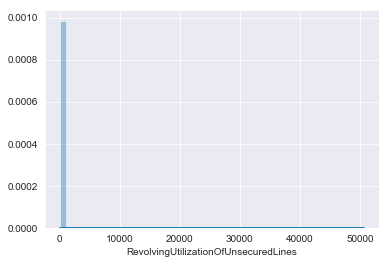

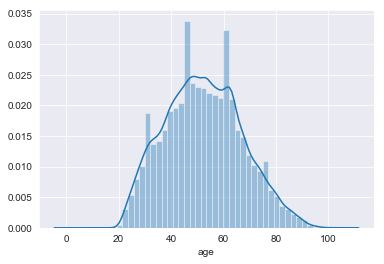

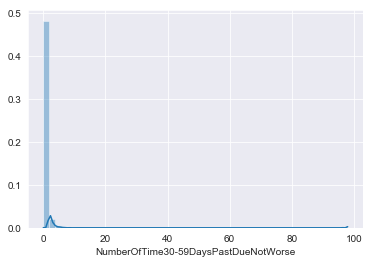

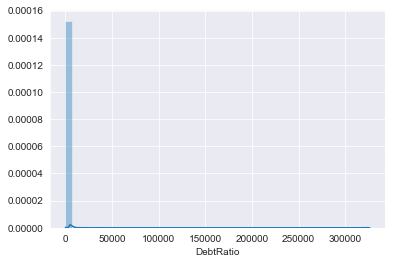

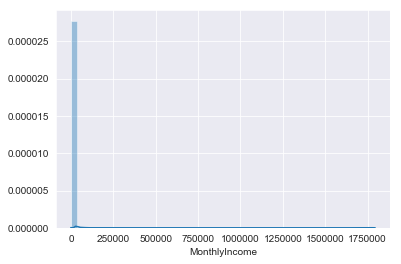

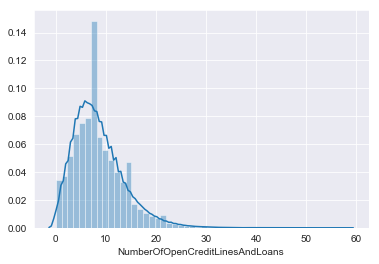

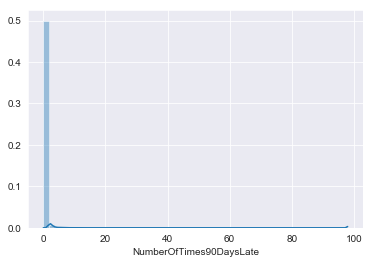

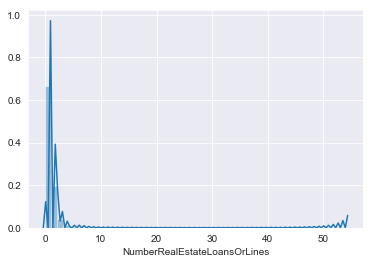

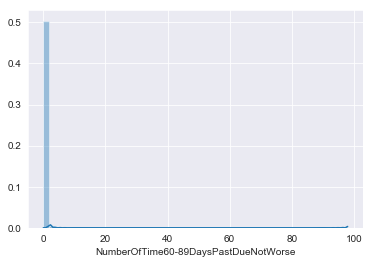

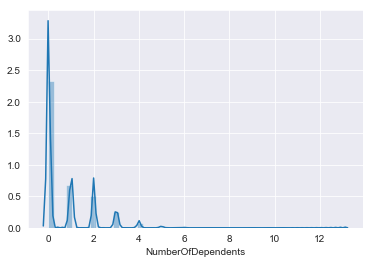

In [42]:
for col in numerical: #Give Me Some Credit
    plt.figure()
    sns.distplot(data_plot[col])

# Discriminate Output

### KDE plot

C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `

<Figure size 432x288 with 0 Axes>

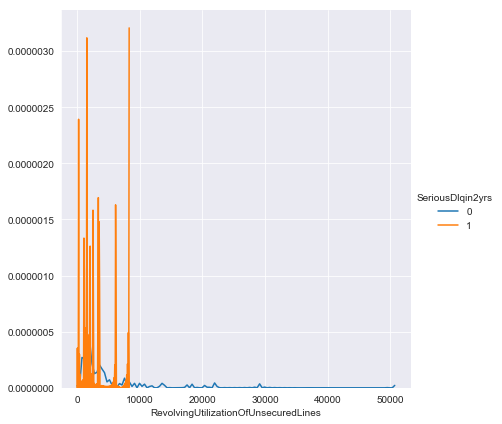

<Figure size 432x288 with 0 Axes>

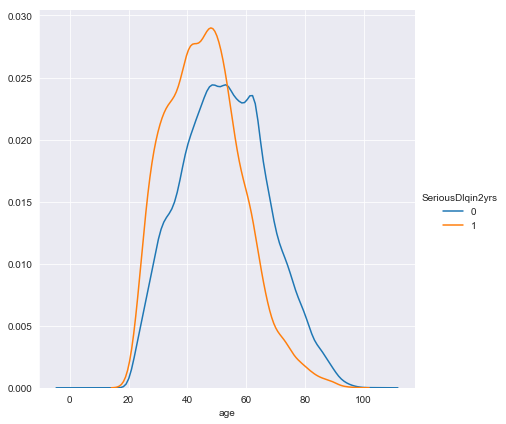

<Figure size 432x288 with 0 Axes>

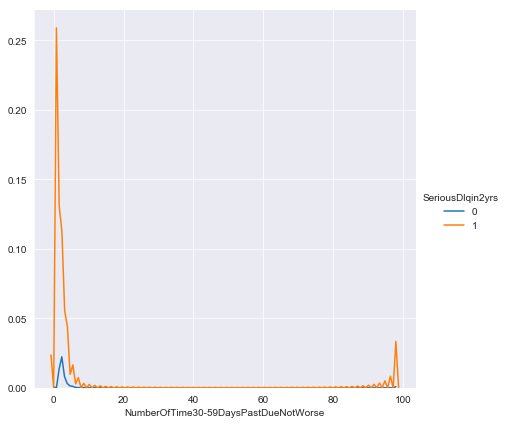

<Figure size 432x288 with 0 Axes>

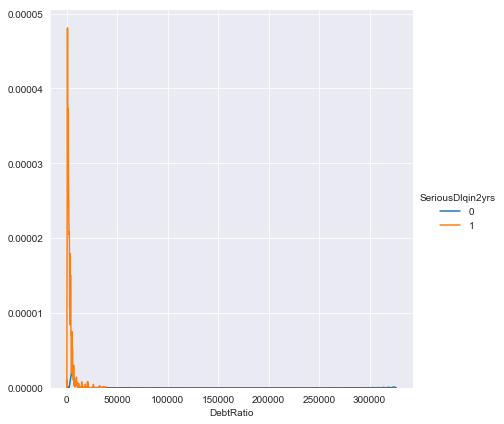

<Figure size 432x288 with 0 Axes>

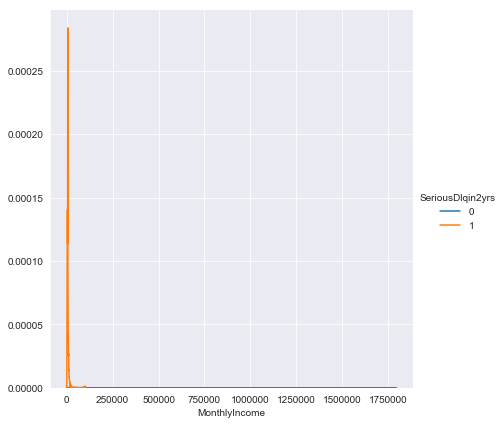

<Figure size 432x288 with 0 Axes>

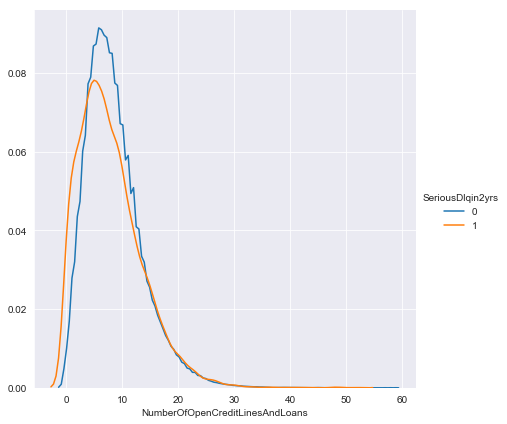

<Figure size 432x288 with 0 Axes>

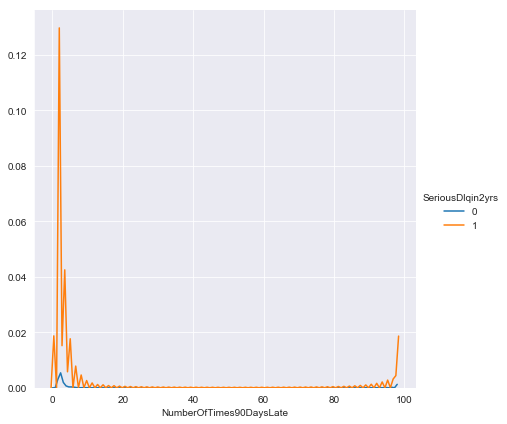

<Figure size 432x288 with 0 Axes>

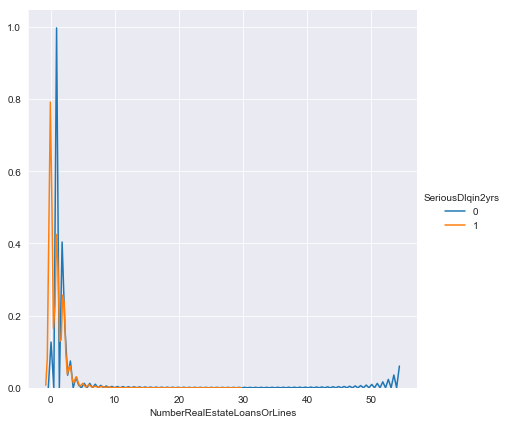

<Figure size 432x288 with 0 Axes>

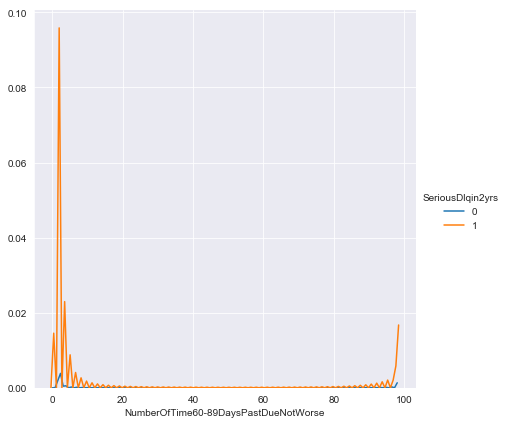

<Figure size 432x288 with 0 Axes>

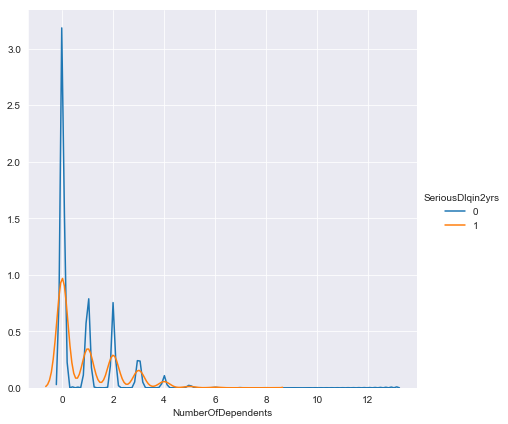

In [43]:
for col in numerical:
    plt.figure()
    ax = sns.FacetGrid(data_plot, hue="SeriousDlqin2yrs", size=6)
    ax.map(sns.kdeplot, col)
    ax.add_legend()

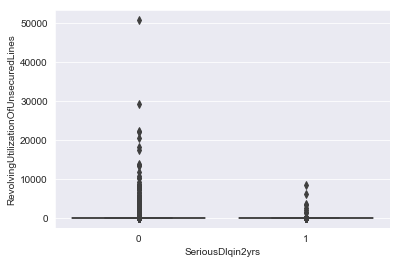

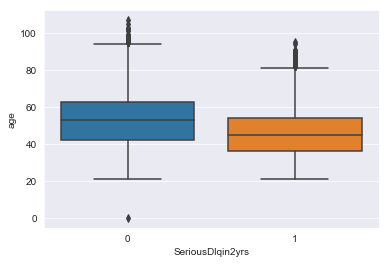

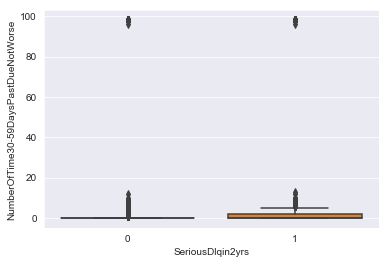

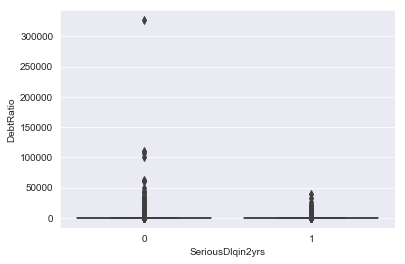

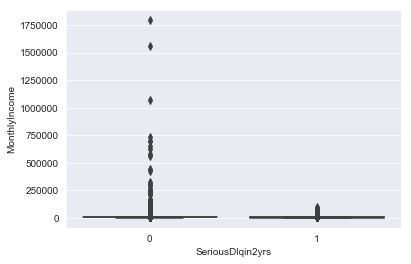

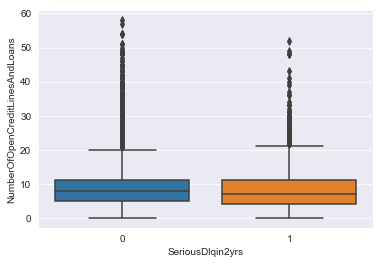

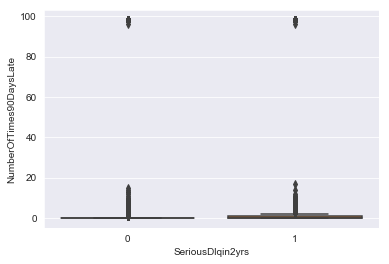

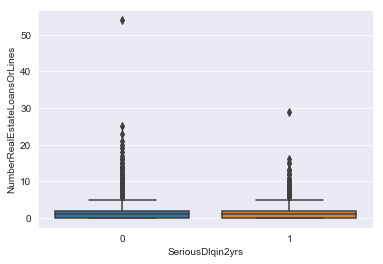

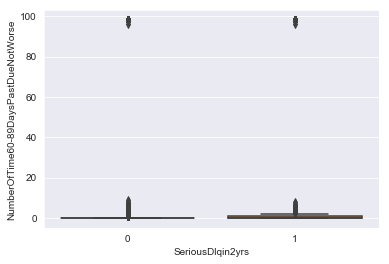

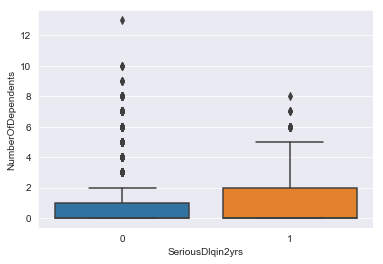

In [44]:
for col in numerical:
    plt.figure()
    sns.boxplot(x = data_plot['SeriousDlqin2yrs'], y = data_plot[col])

In [45]:
data_plot['SeriousDlqin2yrs'].value_counts(normalize=True)

0    0.932606
1    0.067394
Name: SeriousDlqin2yrs, dtype: float64

# Feature Engineering

## Data Transformation

#### Column : RevolvingUtilizationOfUnsecuredLines

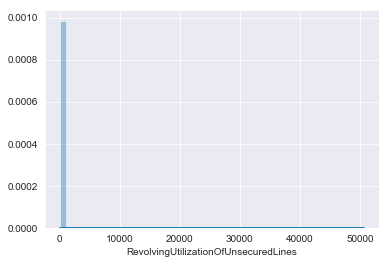

In [46]:
# distribusi kolom RevolvingUtilizationOfUnsecuredLines
sns.distplot(data_plot['RevolvingUtilizationOfUnsecuredLines'])

In [47]:
# mengambil cutoff 3*std dari kolom RevolvingUtilizationOfUnsecuredLines
cutoff_3std = data_plot["RevolvingUtilizationOfUnsecuredLines"].std()*3
cutoff_3std

812.0996973575541

In [48]:
# mengambil median dari kolom RevolvingUtilizationOfUnsecuredLines
median_col = data_plot["RevolvingUtilizationOfUnsecuredLines"].median()
median_col

0.15388924699999998

In [49]:
# mengganti nilai diatas 3std pada kolom RevolvingUtilizationOfUnsecuredLines dengan nilai median
data_plot.loc[data_plot["RevolvingUtilizationOfUnsecuredLines"]>cutoff_3std] = median_col

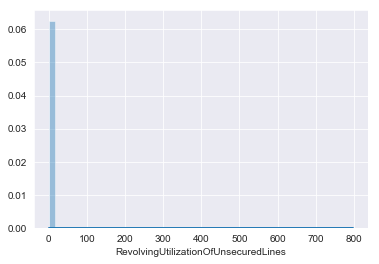

In [50]:
# distribusi setelah mengahapus nilai diatas 3std
sns.distplot(data_plot["RevolvingUtilizationOfUnsecuredLines"])

In [51]:
# transformasi data menggunakan log(x+1)
# menggunakan (x+1) untuk mengatasi nilai 0
data_transform = np.log(data_plot["RevolvingUtilizationOfUnsecuredLines"]+1)

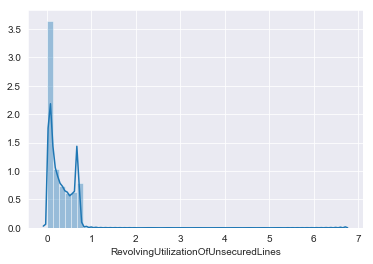

In [52]:
# distribusi setelah log transform
sns.distplot(data_transform)

#### Column : DebtRatio

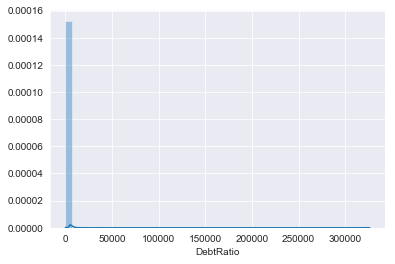

In [53]:
sns.distplot(data_plot['DebtRatio'])

In [54]:
cutoff_3std = data_plot["DebtRatio"].std()*3
cutoff_3std

4893.741495613978

In [55]:
median_col = data_plot["DebtRatio"].median()
median_col

0.367647059

In [56]:
data_plot.loc[data_plot["DebtRatio"]>cutoff_3std] = median_col

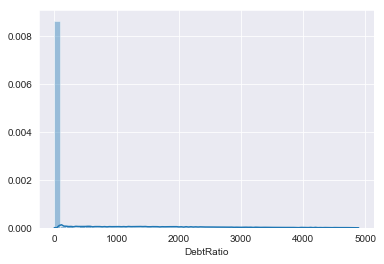

In [57]:
sns.distplot(data_plot["DebtRatio"])

In [58]:
data_transform = np.log(data_plot["DebtRatio"]+1)

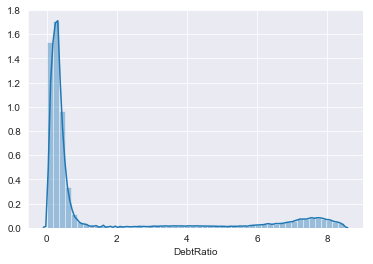

In [59]:
sns.distplot(data_transform)

### Select columns for data transform

In [60]:
# kolom numerik
numerical

Index(['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [61]:
num_col_transform = list(numerical)

In [62]:
# menghapus kolom yang tidak perlu ditransformasi
num_col_transform.remove('age')
num_col_transform.remove('NumberOfOpenCreditLinesAndLoans')
num_col_transform.remove('NumberOfDependents')

In [63]:
# kolom yang perlu ditransformasi
num_col_transform

['RevolvingUtilizationOfUnsecuredLines',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfTimes90DaysLate',
 'NumberRealEstateLoansOrLines',
 'NumberOfTime60-89DaysPastDueNotWorse']

In [64]:
# save nama kolom tersebut
joblib.dump(num_col_transform, 'num_col_transform.pkl')

['num_col_transform.pkl']

### Save median for each numerical columns

In [65]:
# menyiapkan series untuk menyimpan median
median_num_col = pd.Series([])

In [66]:
# mengambil median tiap kolom
for col in numerical:
    median_num_col[col] = x_train_num_imput[col].median()

In [67]:
median_num_col

RevolvingUtilizationOfUnsecuredLines       0.153889
age                                       52.000000
NumberOfTime30-59DaysPastDueNotWorse       0.000000
DebtRatio                                  0.368246
MonthlyIncome                           5400.000000
NumberOfOpenCreditLinesAndLoans            8.000000
NumberOfTimes90DaysLate                    0.000000
NumberRealEstateLoansOrLines               1.000000
NumberOfTime60-89DaysPastDueNotWorse       0.000000
NumberOfDependents                         0.000000
dtype: float64

In [68]:
# save median
joblib.dump(median_num_col, 'median_num_col.pkl')

['median_num_col.pkl']

### Save threshold (3*std) for earch numerical columns

In [69]:
# menyiapkan series untuk menyimpan cuttoff 3std
cutoff_std = pd.Series([])

In [70]:
# mengambil cutoff tiap kolom
for col in numerical:
    cutoff_std[col] = x_train_num_imput[col].std()*3

In [71]:
# save cutoff
joblib.dump(cutoff_std, 'cutoff_std.pkl')

['cutoff_std.pkl']

In [72]:
cutoff_std

RevolvingUtilizationOfUnsecuredLines      812.099697
age                                        44.140323
NumberOfTime30-59DaysPastDueNotWorse       11.863654
DebtRatio                                4898.689039
MonthlyIncome                           33210.089654
NumberOfOpenCreditLinesAndLoans            15.432627
NumberOfTimes90DaysLate                    11.786675
NumberRealEstateLoansOrLines                3.381993
NumberOfTime60-89DaysPastDueNotWorse       11.739469
NumberOfDependents                          3.320512
dtype: float64

In [73]:
def normalizeData(data_,
                  transform_column,
                  cutoff_point,
                  median_transform):
    '''
    Fungsi untuk transformasi data dengan :
        1. Mengganti nilai diatas 3std menjadi median
        2. Log transform tiap kolom
        
    Parameter
    ----------
    data_ : DataFrame, 
        data kolom numerik
    transform_column:  
        Kolom yang ditransformasi
    cutoff_point : DataFrame, 
        titik potong untuk diatas 3std
    median_transform:  Object,
        nilai median untuk mengganti nilai diatas 3std

    Output
    -------
    data :  DataFrame     
    
    '''

    # copy data_ ke data, agar tidak merusak nilai pada data input (x_train_numeric_imputed)
    data = data_.copy()
    
    # mengambil kolom yang perlu ditransformasi
    data = data[transform_column]
    
    # proses mengganti nilai diatas 3std dengan median
    for col in transform_column:
        data.loc[data[col]>cutoff_point[col], col] =  median_transform[col] 
        
        # log transform tiap kolom
        data[col] = np.log(data[col]+1)
        
    # menambahakan akhiran _log pada nama kolom
    data = data.add_suffix('_log')
        
    return data 

In [74]:
x_train_num_log  = normalizeData(x_train_num_imput, 
                                num_col_transform,
                                 cutoff_std,
                                 median_num_col)
x_train_num_log.head()

,RevolvingUtilizationOfUnsecuredLines_log,NumberOfTime30-59DaysPastDueNotWorse_log,DebtRatio_log,MonthlyIncome_log,NumberOfTimes90DaysLate_log,NumberRealEstateLoansOrLines_log,NumberOfTime60-89DaysPastDueNotWorse_log
135401,0.055859,0.0,0.018708,8.188967,0.0,0.000000,0.0
72965,0.010146,0.0,0.179184,8.922792,0.0,0.693147,0.0
80667,0.285650,0.0,0.236824,9.028099,0.0,0.693147,0.0
119757,0.481845,0.0,0.205257,9.359536,0.0,0.000000,0.0
19899,0.030185,0.0,0.420679,8.412055,0.0,0.693147,0.0


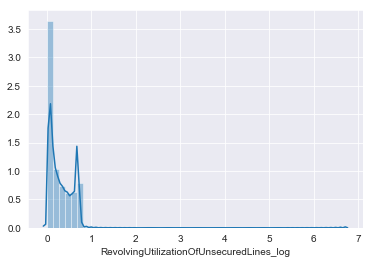

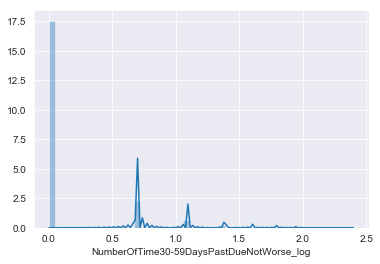

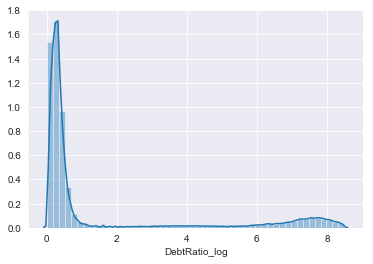

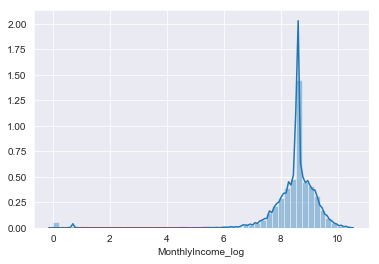

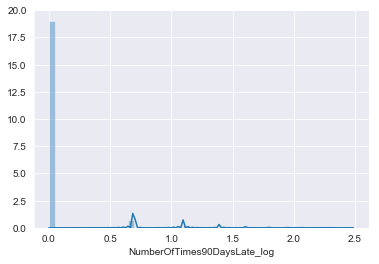

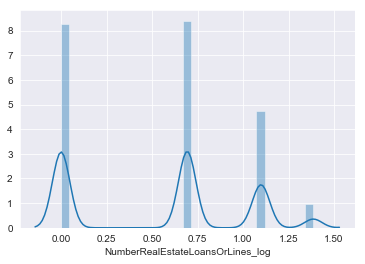

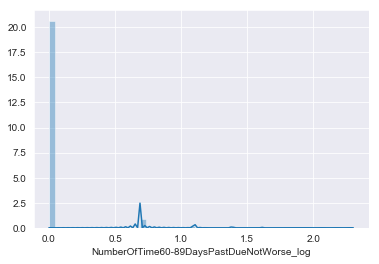

In [75]:
# melihat distribusi setelah transformasi
for col in num_col_transform:
    plt.figure()
    sns.distplot(x_train_num_log[col+'_log'])
    

## Square Feature

In [76]:
# menyiapkan dataframe untuk feature square
square_feature = pd.DataFrame()

In [77]:
# menghitung square dari tiap kolom feature
for col in x_train_num_log.columns:
    square_feature[col+'_square'] = x_train_num_log[col]**2

In [78]:
square_feature.head()

,RevolvingUtilizationOfUnsecuredLines_log_square,NumberOfTime30-59DaysPastDueNotWorse_log_square,DebtRatio_log_square,MonthlyIncome_log_square,NumberOfTimes90DaysLate_log_square,NumberRealEstateLoansOrLines_log_square,NumberOfTime60-89DaysPastDueNotWorse_log_square
135401,0.003120,0.0,0.000350,67.059178,0.0,0.000000,0.0
72965,0.000103,0.0,0.032107,79.616210,0.0,0.480453,0.0
80667,0.081596,0.0,0.056086,81.506568,0.0,0.480453,0.0
119757,0.232175,0.0,0.042130,87.600913,0.0,0.000000,0.0
19899,0.000911,0.0,0.176971,70.762667,0.0,0.480453,0.0


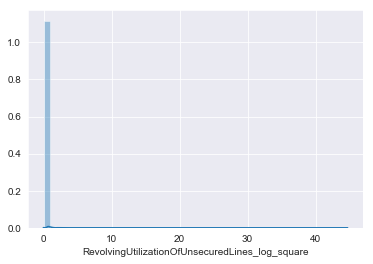

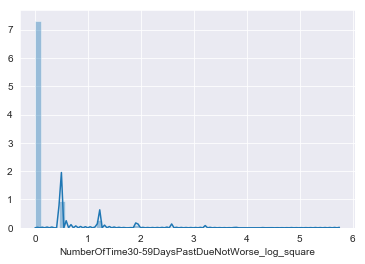

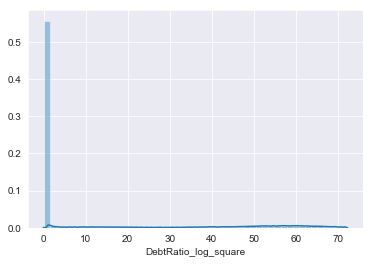

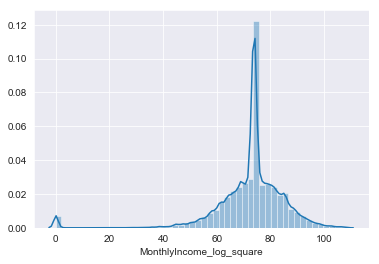

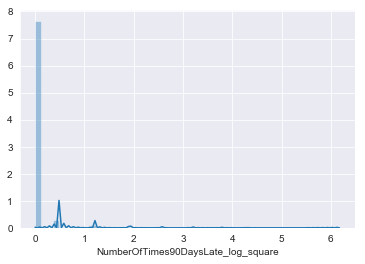

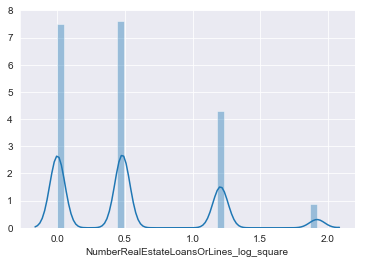

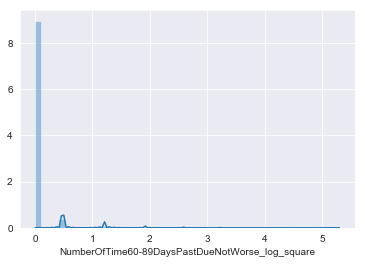

In [79]:
for col in square_feature.columns:
    plt.figure()
    sns.distplot(square_feature[col])
    

In [80]:
# membuat normalizeData dan square_feature ke dalam satu fungsi
def featureEngineering(data, 
                       transform_column, 
                       median_transform,
                      cutoff_point):
    
    '''
    Fungsi untuk feature engineering, melakukan:
        1. Mengganti nilai diatas 3std menjadi median, kemudian Log transform tiap kolom
        2. Membuat feature baru dengan mengkuadratkan nilai tiap kolom
        
    Parameter
    ----------
    data_ : DataFrame, 
        data kolom numerik
    transform_column:  
        Kolom yang ditransformasi
    median_transform:  Object,
        nilai median untuk mengganti nilai diatas 3std
    cutoff_point : DataFrame, 
        titik potong untuk diatas 3std


    Output
    -------
    data :  DataFrame     
    
    '''
    # normalizeData
    data_log = normalizeData(data,
                             transform_column,
                             cutoff_point,
                             median_transform)
    # square feature
    data_square_log = pd.DataFrame()
    for col in data_log.columns:
        data_square_log[col+'_square'] = data_log[col]**2
    
    # join
    data_num_log_square = pd.concat([data,
                                    data_log,
                                    data_square_log],
                                   axis = 1)

    return data_num_log_square

In [81]:
x_train_num_log_square = featureEngineering(x_train_num_imput,
                                            num_col_transform,
                                           median_num_col,
                                           cutoff_std)
x_train_num_log_square.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,...,NumberOfTimes90DaysLate_log,NumberRealEstateLoansOrLines_log,NumberOfTime60-89DaysPastDueNotWorse_log,RevolvingUtilizationOfUnsecuredLines_log_square,NumberOfTime30-59DaysPastDueNotWorse_log_square,DebtRatio_log_square,MonthlyIncome_log_square,NumberOfTimes90DaysLate_log_square,NumberRealEstateLoansOrLines_log_square,NumberOfTime60-89DaysPastDueNotWorse_log_square
135401,0.057449,55.0,0.0,0.018884,3600.0,7.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.003120,0.0,0.000350,67.059178,0.0,0.000000,0.0
72965,0.010198,46.0,0.0,0.196241,7500.0,4.0,0.0,1.0,0.0,1.0,...,0.0,0.693147,0.0,0.000103,0.0,0.032107,79.616210,0.0,0.480453,0.0
80667,0.330626,41.0,0.0,0.267219,8333.0,7.0,0.0,1.0,0.0,1.0,...,0.0,0.693147,0.0,0.081596,0.0,0.056086,81.506568,0.0,0.480453,0.0
119757,0.619059,47.0,0.0,0.227840,11608.0,24.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.232175,0.0,0.042130,87.600913,0.0,0.000000,0.0
19899,0.030646,34.0,0.0,0.522995,4500.0,15.0,0.0,1.0,0.0,1.0,...,0.0,0.693147,0.0,0.000911,0.0,0.176971,70.762667,0.0,0.480453,0.0


In [82]:
joblib.dump(x_train_num_log_square, 'x_train_num_log_square.pkl')

['x_train_num_log_square.pkl']

# Numerical Standardizing


In [83]:
# import library untuk standardizing
from sklearn.preprocessing import StandardScaler

# <font color = 'blue'> FUNCTION: fitStandardize

In [84]:
from sklearn.preprocessing import StandardScaler
def fitStandardize(data):
    '''
    Fitting standardizer untuk data numerik
    
    Parameter
    ----------
    data : DataFrame, 
        data kolom numerik
        
    Output
    -------
    standard    : Object StandardScaler setelah difit
    
    '''
    standard = StandardScaler()
    standard.fit(data)
    return standard

In [85]:
standardizer = fitStandardize(x_train_num_log_square)

In [86]:
# save standardizer
joblib.dump(standardizer, 'standardizer.pkl')

['standardizer.pkl']

# <font color = 'blue'> FUNCTION: transformNumerical

In [87]:
x_train_num_std = transformNumerical(x_train_num_log_square, standardizer)

In [88]:
x_train_num_std.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,...,NumberOfTimes90DaysLate_log,NumberRealEstateLoansOrLines_log,NumberOfTime60-89DaysPastDueNotWorse_log,RevolvingUtilizationOfUnsecuredLines_log_square,NumberOfTime30-59DaysPastDueNotWorse_log_square,DebtRatio_log_square,MonthlyIncome_log_square,NumberOfTimes90DaysLate_log_square,NumberRealEstateLoansOrLines_log_square,NumberOfTime60-89DaysPastDueNotWorse_log_square
135401,-0.022921,0.180907,-0.101741,-0.215825,-0.254344,-0.290723,-0.062835,-0.909634,-0.056161,-0.669173,...,-0.223237,-1.194565,-0.216956,-0.196730,-0.327208,-0.440591,-0.411523,-0.178479,-0.970458,-0.181904
72965,-0.023096,-0.430782,-0.101741,-0.215716,0.097960,-0.873906,-0.062835,-0.022580,-0.056161,0.234306,...,-0.223237,0.306791,-0.216956,-0.201242,-0.327208,-0.438937,0.520731,-0.178479,-0.069142,-0.181904
80667,-0.021912,-0.770609,-0.101741,-0.215672,0.173209,-0.290723,-0.062835,-0.022580,-0.056161,0.234306,...,-0.223237,0.306791,-0.216956,-0.079390,-0.327208,-0.437687,0.661074,-0.178479,-0.069142,-0.181904
119757,-0.020847,-0.362816,-0.101741,-0.215697,0.469054,3.013979,-0.062835,-0.909634,-0.056161,-0.669173,...,-0.223237,-1.194565,-0.216956,0.145762,-0.327208,-0.438414,1.113527,-0.178479,-0.970458,-0.181904
19899,-0.023020,-1.246366,-0.101741,-0.215516,-0.173043,1.264431,-0.062835,-0.022580,-0.056161,0.234306,...,-0.223237,0.306791,-0.216956,-0.200033,-0.327208,-0.431388,-0.136570,-0.178479,-0.069142,-0.181904


In [89]:
x_train_num_std.shape

(112043, 24)

# Categorical Dummy

In [90]:
# cek head dari data_categorical_imputed
x_train_cat_imput.head()

,DependentsClass
135401,0-4
72965,0-4
80667,0-4
119757,0-4
19899,0-4


In [91]:
x_train_cat_imput.shape

(112043, 1)

In [92]:
x_train_cat_imput.DependentsClass.value_counts()

0-4       108437
KOSONG      2867
5-9          735
10>            4
Name: DependentsClass, dtype: int64

In [93]:
x_train_cat_dummy = pd.get_dummies(x_train_cat_imput)
x_train_cat_dummy.head()

,DependentsClass_0-4,DependentsClass_10>,DependentsClass_5-9,DependentsClass_KOSONG
135401,1,0,0,0
72965,1,0,0,0
80667,1,0,0,0
119757,1,0,0,0
19899,1,0,0,0


In [94]:
x_train_cat_dummy.shape

(112043, 4)

# Join Data Numerical Standard & Categorical Dummy

In [95]:
# gabungkan data_numerical, data_categorical, dan data_output
x_train_clean = pd.concat([x_train_num_std, x_train_cat_dummy], axis=1)

In [96]:
# cek head dari data
x_train_clean.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,...,NumberOfTime30-59DaysPastDueNotWorse_log_square,DebtRatio_log_square,MonthlyIncome_log_square,NumberOfTimes90DaysLate_log_square,NumberRealEstateLoansOrLines_log_square,NumberOfTime60-89DaysPastDueNotWorse_log_square,DependentsClass_0-4,DependentsClass_10>,DependentsClass_5-9,DependentsClass_KOSONG
135401,-0.022921,0.180907,-0.101741,-0.215825,-0.254344,-0.290723,-0.062835,-0.909634,-0.056161,-0.669173,...,-0.327208,-0.440591,-0.411523,-0.178479,-0.970458,-0.181904,1,0,0,0
72965,-0.023096,-0.430782,-0.101741,-0.215716,0.097960,-0.873906,-0.062835,-0.022580,-0.056161,0.234306,...,-0.327208,-0.438937,0.520731,-0.178479,-0.069142,-0.181904,1,0,0,0
80667,-0.021912,-0.770609,-0.101741,-0.215672,0.173209,-0.290723,-0.062835,-0.022580,-0.056161,0.234306,...,-0.327208,-0.437687,0.661074,-0.178479,-0.069142,-0.181904,1,0,0,0
119757,-0.020847,-0.362816,-0.101741,-0.215697,0.469054,3.013979,-0.062835,-0.909634,-0.056161,-0.669173,...,-0.327208,-0.438414,1.113527,-0.178479,-0.970458,-0.181904,1,0,0,0
19899,-0.023020,-1.246366,-0.101741,-0.215516,-0.173043,1.264431,-0.062835,-0.022580,-0.056161,0.234306,...,-0.327208,-0.431388,-0.136570,-0.178479,-0.069142,-0.181904,1,0,0,0


In [97]:
x_train_clean.isnull().sum()

RevolvingUtilizationOfUnsecuredLines               0
age                                                0
NumberOfTime30-59DaysPastDueNotWorse               0
DebtRatio                                          0
MonthlyIncome                                      0
NumberOfOpenCreditLinesAndLoans                    0
NumberOfTimes90DaysLate                            0
NumberRealEstateLoansOrLines                       0
NumberOfTime60-89DaysPastDueNotWorse               0
NumberOfDependents                                 0
RevolvingUtilizationOfUnsecuredLines_log           0
NumberOfTime30-59DaysPastDueNotWorse_log           0
DebtRatio_log                                      0
MonthlyIncome_log                                  0
NumberOfTimes90DaysLate_log                        0
NumberRealEstateLoansOrLines_log                   0
NumberOfTime60-89DaysPastDueNotWorse_log           0
RevolvingUtilizationOfUnsecuredLines_log_square    0
NumberOfTime30-59DaysPastDueNotWorse_log_squar

# <font color = 'blue'> FUNCTION: preprocessTest 
(call another function)

In [98]:
def preprocessTest(data,
                   numerical_col,
                   categorical_col, 
                   imputer,
                   standardizer,
                   transform_column, 
                    median_transform,
                   cutoff_point):

    # memisahkan numerical dan categorical
    data_numerical   = data[numerical_col]
    data_categorical = data[categorical_col]
    
    # categorical imputation
    data_categorical_imput = data_categorical.fillna("KOSONG")
    
    # dummy categorical
    data_categorical_dummy = pd.get_dummies(data_categorical_imput)
   
    # numerical imputation  
    data_numerical_imput = transformNumerical(data_numerical, imputer)
    
    # feature engineering
    data_numerical_eng = featureEngineering(data_numerical_imput,
                                            transform_column,
                                            median_transform,
                                            cutoff_point)
        
    # numerical standardizing
    data_numerical_std = transformNumerical(data_numerical_eng, standardizer)
    
    # join numerical and categorical (clean)
    data_train_clean = pd.concat([data_numerical_std, data_categorical_dummy], axis=1)
    
    return data_train_clean
    

In [99]:
numerical_col     = joblib.load("numerical_col.pkl")
categorical_col   = joblib.load("categorical_col.pkl")
imputer           = joblib.load("imputer.pkl")
standardizer      = joblib.load("standardizer.pkl") 
num_col_transform = joblib.load("num_col_transform.pkl")
median_num_col    = joblib.load("median_num_col.pkl")
cutoff_std        = joblib.load("cutoff_std.pkl")

In [100]:
# preprocess data test dengan function preprocessTest
x_test_clean = preprocessTest(x_test,
                              numerical_col, 
                              categorical_col,
                              imputer,
                              standardizer,
                              num_col_transform, 
                              median_num_col,
                              cutoff_std)
x_test_clean.head() # cek head

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,...,NumberOfTime30-59DaysPastDueNotWorse_log_square,DebtRatio_log_square,MonthlyIncome_log_square,NumberOfTimes90DaysLate_log_square,NumberRealEstateLoansOrLines_log_square,NumberOfTime60-89DaysPastDueNotWorse_log_square,DependentsClass_0-4,DependentsClass_10>,DependentsClass_5-9,DependentsClass_KOSONG
38843,-0.019440,0.792595,0.151134,-0.215724,-0.431761,-1.262694,-0.062835,-0.909634,-0.056161,-0.669173,...,0.809793,-0.439134,-1.323952,-0.178479,-0.970458,-0.181904,1,0,0,0
41287,-0.020237,0.520733,-0.101741,-0.215458,-0.166449,0.292460,-0.062835,-0.022580,-0.056161,-0.669173,...,-0.327208,-0.428569,-0.116456,-0.178479,-0.069142,-0.181904,1,0,0,0
121098,-0.021958,-0.974505,-0.101741,-0.215590,-0.335645,1.070037,-0.062835,-0.022580,-0.056161,0.234306,...,-0.327208,-0.434649,-0.755070,-0.178479,-0.069142,-0.181904,1,0,0,0
89832,-0.020325,1.676145,-0.101741,-0.215529,0.281068,0.681248,-0.062835,0.864475,-0.056161,-0.669173,...,-0.327208,-0.431995,0.841889,-0.178479,1.293743,-0.181904,1,0,0,0
72014,-0.022457,1.608179,-0.101741,-0.215532,-0.278463,0.292460,-0.062835,0.864475,-0.056161,-0.669173,...,-0.327208,-0.432161,-0.504756,-0.178479,1.293743,-0.181904,1,0,0,0


# Modelling with Machine Learning


## Benchmark

In [101]:
# hitung benchmark pada data_train
y_train.value_counts(normalize=True)

0    0.932606
1    0.067394
Name: SeriousDlqin2yrs, dtype: float64

## Logistic Regression

In [102]:
from sklearn.linear_model import LogisticRegression

In [103]:
logreg = LogisticRegression(random_state=123)

In [104]:
logreg.fit(x_train_clean, y_train)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=123, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [105]:
x_train_clean.shape

(112043, 28)

In [106]:
y_train.shape

(112043,)

In [107]:
logreg.score(x_train_clean, y_train)

0.9368903010451345

In [108]:
logreg.score(x_test_clean, y_test)

0.9371586162578986

In [109]:
from sklearn.metrics import confusion_matrix

In [110]:
confusion_matrix(y_train, logreg.predict(x_train_clean))

array([[103431,   1061],
       [  6010,   1541]], dtype=int64)

In [111]:
from sklearn.metrics import classification_report

In [112]:
print(classification_report(y_train, logreg.predict(x_train_clean)))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97    104492
           1       0.59      0.20      0.30      7551

   micro avg       0.94      0.94      0.94    112043
   macro avg       0.77      0.60      0.64    112043
weighted avg       0.92      0.94      0.92    112043



In [113]:
print(classification_report(y_test, logreg.predict(x_test_clean)))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     34890
           1       0.57      0.19      0.28      2458

   micro avg       0.94      0.94      0.94     37348
   macro avg       0.76      0.59      0.63     37348
weighted avg       0.92      0.94      0.92     37348



## RandomForest 

In [114]:
from sklearn.ensemble import RandomForestClassifier

In [115]:
random_forest = RandomForestClassifier(random_state=123)

In [116]:
random_forest.fit(x_train_clean, y_train)

C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=123, verbose=0, warm_start=False)

In [117]:
random_forest.score(x_train_clean, y_train)

0.9904947207768446

In [118]:
print(classification_report(y_train, random_forest.predict(x_train_clean)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    104492
           1       0.99      0.86      0.92      7551

   micro avg       0.99      0.99      0.99    112043
   macro avg       0.99      0.93      0.96    112043
weighted avg       0.99      0.99      0.99    112043



In [119]:
print(classification_report(y_test, random_forest.predict(x_test_clean)))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96     34890
           1       0.47      0.17      0.25      2458

   micro avg       0.93      0.93      0.93     37348
   macro avg       0.71      0.58      0.61     37348
weighted avg       0.91      0.93      0.92     37348



# What is The Good Measure of <i>“Model Quality”</i> from Machine Learning Standpoint?

## <font color='blue'> Confusion Matrix

<img src="img/confusion_matrix.png", align="middle">

<img src="img/precision_recall.png", align="middle">

<img src="img/precision_recall2.png", align="middle">

# RandomSearchCV

In [120]:
from sklearn.model_selection import RandomizedSearchCV

## Logistic Regression

In [121]:
param = {'C': [1, 0.333, 0.1, 0.0333,
               0.01, 0.00333, 0.001]}

def logreg_cv(param, x_train, y_train):
    logreg = LogisticRegression(random_state = 123)
    
    logregCV = RandomizedSearchCV(logreg,
                       param_distributions = param,
                       n_iter= 3,
                       cv = 5,
                       random_state = 123,
                       verbose = 10)
    logregCV.fit(x_train, y_train)
    
    return logregCV

In [122]:
logreg_cv_fitted = logreg_cv(param,
                             x_train_clean,
                             y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] C=0.333 .........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ................ C=0.333, score=0.9360999553770638, total=   2.4s
[CV] C=0.333 .........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ................ C=0.333, score=0.9369449774644116, total=   2.4s
[CV] C=0.333 .........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.1s remaining:    0.0s
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ................ C=0.333, score=0.9380132095680114, total=   3.0s
[CV] C=0.333 .........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    8.2s remaining:    0.0s
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ................ C=0.333, score=0.9361388789717958, total=   2.9s
[CV] C=0.333 .........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   11.3s remaining:    0.0s
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ................ C=0.333, score=0.9365405212424134, total=   2.4s
[CV] C=0.0333 ........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   13.8s remaining:    0.0s
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ................ C=0.0333, score=0.936144578313253, total=   2.0s
[CV] C=0.0333 ........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   15.9s remaining:    0.0s
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............... C=0.0333, score=0.9369003525369272, total=   2.0s
[CV] C=0.0333 ........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   18.1s remaining:    0.0s
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............... C=0.0333, score=0.9380578364869689, total=   1.9s
[CV] C=0.0333 ........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   20.1s remaining:    0.0s
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............... C=0.0333, score=0.9365405212424134, total=   1.9s
[CV] C=0.0333 ........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   22.2s remaining:    0.0s
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............... C=0.0333, score=0.9368082827561585, total=   1.8s
[CV] C=0.01 ..........................................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .................. C=0.01, score=0.935921463632307, total=   1.7s
[CV] C=0.01 ..........................................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ................. C=0.01, score=0.9369896023918961, total=   2.0s
[CV] C=0.01 ..........................................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .................. C=0.01, score=0.938414851838629, total=   1.7s
[CV] C=0.01 ..........................................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ................. C=0.01, score=0.9363173866476259, total=   1.8s
[CV] C=0.01 ..........................................................


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .................. C=0.01, score=0.936674401999286, total=   1.6s


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   33.7s finished
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [123]:
logreg_cv_fitted.best_params_

{'C': 0.0333}

In [124]:
# Accuracy di cross validation
logreg_cv_fitted.best_score_

0.9368903010451345

In [125]:
# Accuracy di training 
logreg_cv_fitted.score(x_train_clean, y_train)

0.9368992261899449

In [126]:
logreg_cv_fitted.score(x_test_clean, y_test)

0.9373192674306522

In [127]:
print(classification_report(y_train, logreg_cv_fitted.predict(x_train_clean)))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97    104492
           1       0.59      0.20      0.30      7551

   micro avg       0.94      0.94      0.94    112043
   macro avg       0.77      0.60      0.63    112043
weighted avg       0.92      0.94      0.92    112043



In [128]:
print(classification_report(y_test, logreg_cv_fitted.predict(x_test_clean)))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     34890
           1       0.57      0.19      0.29      2458

   micro avg       0.94      0.94      0.94     37348
   macro avg       0.76      0.59      0.63     37348
weighted avg       0.92      0.94      0.92     37348



In [129]:
joblib.dump(logreg_cv_fitted, "logreg_cv.pkl")

['logreg_cv.pkl']

## RandomForest

In [130]:
# param = {'min_samples_leaf': [3, 5, 7, 9, 13, 17, 21],
#          'max_features': ['sqrt', 'log2', 0.25, 0.5, 0.75], 
#          'n_estimators': [10, 20, 30, 50, 75, 100]}

# def random_forest_cv(param, x_train, y_train):
#     random_forest = RandomForestClassifier(random_state = 123)
    
#     random_forestCV = RandomizedSearchCV(random_forest,
#                        param_distributions = param,
#                        n_iter= 3,
#                        cv = 5,
#                        random_state = 123,
#                        verbose = 10,
#                         n_jobs = -1)
#     random_forestCV.fit(x_train, y_train)
    
#     return random_forestCV

In [131]:
# random_forest_cv_fitted = random_forest_cv(param,
#                                            x_train_clean,
#                                            y_train)

In [132]:
# random_forest_cv_fitted.best_params_

In [133]:
# random_forest_cv_fitted.score(x_train_clean, y_train)

In [134]:
# random_forest_cv_fitted.score(x_test_clean, y_test)

In [135]:
# print(classification_report(y_train, random_forest_cv_fitted.predict(x_train_clean)))

In [136]:
# print(classification_report(y_test, random_forest_cv_fitted.predict(x_test_clean)))

In [137]:
# joblib.dump(random_forest_cv_fitted, "rf_cv.pkl")

# Feature Selection

### L1 Regulatization

In [138]:
# import SelectFromModel untuk feature selection
from sklearn.feature_selection import SelectFromModel

In [139]:
# feature selection menggunakan L1 regularization pada logreg
estimator = LogisticRegression(penalty='l1',
                               C=0.0333,
                              random_state=123)

In [140]:
# fit ke data train
estimator.fit(x_train_clean, y_train)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.0333, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l1', random_state=123,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [141]:
# membuat object untuk feature selection
sfm = SelectFromModel(estimator,
                     prefit=True)

In [142]:
# melihat feature yang dipilih
sfm.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
       False])

In [143]:
# index feature yang dipilih
selected_col_idx = np.where(sfm.get_support() == True)
selected_col_idx

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23], dtype=int64),)

In [144]:
# mengambil nama kolom yang dipilih
selected_col = x_train_clean.columns[selected_col_idx]

In [145]:
# feature x_train yang dipilih
x_train_select = x_train_clean[selected_col]
x_train_select.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfDependents,RevolvingUtilizationOfUnsecuredLines_log,...,NumberOfTimes90DaysLate_log,NumberRealEstateLoansOrLines_log,NumberOfTime60-89DaysPastDueNotWorse_log,RevolvingUtilizationOfUnsecuredLines_log_square,NumberOfTime30-59DaysPastDueNotWorse_log_square,DebtRatio_log_square,MonthlyIncome_log_square,NumberOfTimes90DaysLate_log_square,NumberRealEstateLoansOrLines_log_square,NumberOfTime60-89DaysPastDueNotWorse_log_square
135401,-0.022921,0.180907,-0.101741,-0.215825,-0.254344,-0.290723,-0.062835,-0.909634,-0.669173,-0.709364,...,-0.223237,-1.194565,-0.216956,-0.196730,-0.327208,-0.440591,-0.411523,-0.178479,-0.970458,-0.181904
72965,-0.023096,-0.430782,-0.101741,-0.215716,0.097960,-0.873906,-0.062835,-0.022580,0.234306,-0.878256,...,-0.223237,0.306791,-0.216956,-0.201242,-0.327208,-0.438937,0.520731,-0.178479,-0.069142,-0.181904
80667,-0.021912,-0.770609,-0.101741,-0.215672,0.173209,-0.290723,-0.062835,-0.022580,0.234306,0.139631,...,-0.223237,0.306791,-0.216956,-0.079390,-0.327208,-0.437687,0.661074,-0.178479,-0.069142,-0.181904
119757,-0.020847,-0.362816,-0.101741,-0.215697,0.469054,3.013979,-0.062835,-0.909634,-0.669173,0.864503,...,-0.223237,-1.194565,-0.216956,0.145762,-0.327208,-0.438414,1.113527,-0.178479,-0.970458,-0.181904
19899,-0.023020,-1.246366,-0.101741,-0.215516,-0.173043,1.264431,-0.062835,-0.022580,0.234306,-0.804219,...,-0.223237,0.306791,-0.216956,-0.200033,-0.327208,-0.431388,-0.136570,-0.178479,-0.069142,-0.181904


In [146]:
x_train_select.shape

(112043, 23)

In [147]:
# membuat x_train baru hasil feature selection
x_train_select = sfm.transform(x_train_clean)

In [148]:
# membuat x_test baru hasil feature selection
x_test_select = sfm.transform(x_test_clean)

In [149]:
logreg_select = LogisticRegression(C=0.0333,
                                   random_state=123)

In [150]:
logreg_select.fit(x_train_select, y_train)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.0333, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=123,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [151]:
print(classification_report(y_train, logreg_select.predict(x_train_select)))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97    104492
           1       0.59      0.20      0.30      7551

   micro avg       0.94      0.94      0.94    112043
   macro avg       0.77      0.60      0.63    112043
weighted avg       0.92      0.94      0.92    112043



In [152]:
print(classification_report(y_test, logreg_select.predict(x_test_select)))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     34890
           1       0.57      0.19      0.28      2458

   micro avg       0.94      0.94      0.94     37348
   macro avg       0.76      0.59      0.63     37348
weighted avg       0.92      0.94      0.92     37348



## Backward Elimination

<img src="img/feature_selection/backward_elimination.png", align="middle">

In [153]:
# import library untuk backward elimination
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [154]:
# menggunakan estimator logreg
estimator = LogisticRegression(random_state=123)

In [155]:
x_train_clean.shape

(112043, 28)

In [156]:
# membuat object untuk backward elimination
sfs_backward = SFS(estimator,
                  k_features=24,
                  forward=False,
                  verbose=10,
                  scoring='accuracy',
                  cv=5,
                  n_jobs=-1)

In [157]:
# proses backward elimination
sfs_backward = sfs_backward.fit(x_train_clean.values, y_train.values)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
[Parallel(n_jobs=-1)]: Using b

In [158]:
# score terbaik
sfs_backward.k_score_

0.9371669896142795

In [159]:
# konfigurasi feature yang digunakan dan score masing-masing
sfs_backward.subsets_

{28: {'feature_idx': (0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24,
   25,
   26,
   27),
  'cv_scores': array([0.93605533, 0.93694498, 0.93805784, 0.93613888, 0.93658515]),
  'avg_score': 0.9367564347050843,
  'feature_names': ('0',
   '1',
   '2',
   '3',
   '4',
   '5',
   '6',
   '7',
   '8',
   '9',
   '10',
   '11',
   '12',
   '13',
   '14',
   '15',
   '16',
   '17',
   '18',
   '19',
   '20',
   '21',
   '22',
   '23',
   '24',
   '25',
   '26',
   '27')},
 27: {'feature_idx': (0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   22,
   23,
   24,
   25,
   26,
   27),
  'cv_scores': array([0.93641232, 0.93712348, 0.9383256 , 0.93631739, 0.9366744 ]),
  'avg_score': 0.9369706359504727,
  'feature_names': ('0',
   '1',
   '2',
   '3',
   '4',
   '5',
   '6',
   '7',
   '8',
   '9',

In [160]:
# index feature terbaik
sfs_backward.k_feature_idx_

(0,
 1,
 2,
 3,
 4,
 5,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 17,
 18,
 19,
 20,
 22,
 24,
 25,
 26,
 27)

In [161]:
len(sfs_backward.k_feature_idx_)

24

In [162]:
# mengambil index feature
feature_index = np.array(sfs_backward.k_feature_idx_)

In [163]:
# nama kolom feature yang dipilih
feature_selected = x_train_clean.columns[feature_index]

In [164]:
# data x_train hasil backward elimination
x_train_backward = x_train_clean[feature_selected]
x_train_backward.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,RevolvingUtilizationOfUnsecuredLines_log,...,NumberRealEstateLoansOrLines_log,RevolvingUtilizationOfUnsecuredLines_log_square,NumberOfTime30-59DaysPastDueNotWorse_log_square,DebtRatio_log_square,MonthlyIncome_log_square,NumberRealEstateLoansOrLines_log_square,DependentsClass_0-4,DependentsClass_10>,DependentsClass_5-9,DependentsClass_KOSONG
135401,-0.022921,0.180907,-0.101741,-0.215825,-0.254344,-0.290723,-0.909634,-0.056161,-0.669173,-0.709364,...,-1.194565,-0.196730,-0.327208,-0.440591,-0.411523,-0.970458,1,0,0,0
72965,-0.023096,-0.430782,-0.101741,-0.215716,0.097960,-0.873906,-0.022580,-0.056161,0.234306,-0.878256,...,0.306791,-0.201242,-0.327208,-0.438937,0.520731,-0.069142,1,0,0,0
80667,-0.021912,-0.770609,-0.101741,-0.215672,0.173209,-0.290723,-0.022580,-0.056161,0.234306,0.139631,...,0.306791,-0.079390,-0.327208,-0.437687,0.661074,-0.069142,1,0,0,0
119757,-0.020847,-0.362816,-0.101741,-0.215697,0.469054,3.013979,-0.909634,-0.056161,-0.669173,0.864503,...,-1.194565,0.145762,-0.327208,-0.438414,1.113527,-0.970458,1,0,0,0
19899,-0.023020,-1.246366,-0.101741,-0.215516,-0.173043,1.264431,-0.022580,-0.056161,0.234306,-0.804219,...,0.306791,-0.200033,-0.327208,-0.431388,-0.136570,-0.069142,1,0,0,0


In [165]:
# data x_test hasil backward elimination
x_test_backward = x_test_clean[feature_selected]
x_test_backward.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,RevolvingUtilizationOfUnsecuredLines_log,...,NumberRealEstateLoansOrLines_log,RevolvingUtilizationOfUnsecuredLines_log_square,NumberOfTime30-59DaysPastDueNotWorse_log_square,DebtRatio_log_square,MonthlyIncome_log_square,NumberRealEstateLoansOrLines_log_square,DependentsClass_0-4,DependentsClass_10>,DependentsClass_5-9,DependentsClass_KOSONG
38843,-0.019440,0.792595,0.151134,-0.215724,-0.431761,-1.262694,-0.909634,-0.056161,-0.669173,1.645189,...,-1.194565,0.516998,0.809793,-0.439134,-1.323952,-0.970458,1,0,0,0
41287,-0.020237,0.520733,-0.101741,-0.215458,-0.166449,0.292460,-0.022580,-0.056161,-0.669173,1.223440,...,0.306791,0.299863,-0.327208,-0.428569,-0.116456,-0.069142,1,0,0,0
121098,-0.021958,-0.974505,-0.101741,-0.215590,-0.335645,1.070037,-0.022580,-0.056161,0.234306,0.104765,...,0.306791,-0.087318,-0.327208,-0.434649,-0.755070,-0.069142,1,0,0,0
89832,-0.020325,1.676145,-0.101741,-0.215529,0.281068,0.681248,0.864475,-0.056161,-0.669173,1.173644,...,1.185028,0.276798,-0.327208,-0.431995,0.841889,1.293743,1,0,0,0
72014,-0.022457,1.608179,-0.101741,-0.215532,-0.278463,0.292460,0.864475,-0.056161,-0.669173,-0.293952,...,1.185028,-0.159046,-0.327208,-0.432161,-0.504756,1.293743,1,0,0,0


In [166]:
logreg_backward = LogisticRegression(random_state=123)

In [167]:
logreg_backward.fit(x_train_backward, y_train)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=123, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [168]:
logreg_backward.score(x_train_backward, y_train)

0.9371669805342592

In [169]:
logreg_backward.score(x_test_backward, y_test)

0.9377476705579951

In [170]:
print(classification_report(y_train, logreg_backward.predict(x_train_backward)))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97    104492
           1       0.60      0.20      0.30      7551

   micro avg       0.94      0.94      0.94    112043
   macro avg       0.77      0.59      0.63    112043
weighted avg       0.92      0.94      0.92    112043



In [171]:
print(classification_report(y_test, logreg_backward.predict(x_test_backward)))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     34890
           1       0.59      0.18      0.28      2458

   micro avg       0.94      0.94      0.94     37348
   macro avg       0.77      0.59      0.62     37348
weighted avg       0.92      0.94      0.92     37348



# Model Diagnosis

In [172]:
# membuat dataframe berisi hasil probability dari model
proba_test = pd.DataFrame(logreg.predict_proba(x_test_clean))
proba_test = proba_test.add_prefix('proba_class_')
proba_test.index = y_test.index
proba_test.head()

,proba_class_0,proba_class_1
38843,0.866534,0.133466
41287,0.944024,0.055976
121098,0.953926,0.046074
89832,0.958646,0.041354
72014,0.982819,0.017181


In [173]:
# menggabungkan dengan target asli dari data test
result_test = pd.concat([proba_test, y_test], axis = 1)
result_test.head()

,proba_class_0,proba_class_1,SeriousDlqin2yrs
38843,0.866534,0.133466,0
41287,0.944024,0.055976,1
121098,0.953926,0.046074,0
89832,0.958646,0.041354,0
72014,0.982819,0.017181,0


C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


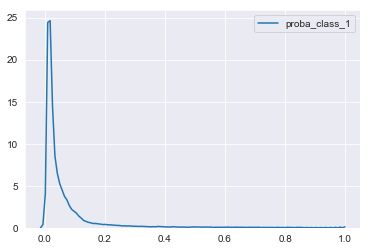

In [174]:
# distribusi probability untuk kelas 1 (default)
sns.kdeplot(result_test["proba_class_1"])

C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


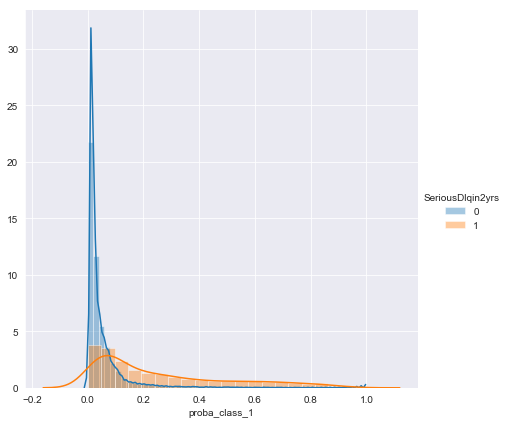

In [175]:
# melihat distribusi probability kelas 1 untuk tiap kelas asli
ax = sns.FacetGrid(result_test, hue="SeriousDlqin2yrs", size=6)
ax.map(sns.distplot, 'proba_class_1')
ax.add_legend()

In [176]:
# meski demikian akurasi pada test tetap tinggi
logreg.score(x_test_clean, y_test)

0.9371586162578986

Distribusi probability pada figure diatas dapat dikategorikan seperti gambar berikut :
<img src="img/class_distribution.png", align="middle">
src :: https://www.medcalc.org/manual/roc-curves.php

In [177]:
# membuat function untuk modelDiagnosis
def modelDiagnosis(x, y, model):
    proba_test = pd.DataFrame(model.predict_proba(x))
    proba_test = proba_test.add_prefix('proba_class_')
    proba_test.index = y.index
    
    result_test = pd.concat([proba_test, y], axis = 1)
    
    plt.figure()
    sns.kdeplot(result_test["proba_class_1"])
    
    plt.figure()
    ax = sns.FacetGrid(result_test, hue="SeriousDlqin2yrs", size=6)
    ax.map(sns.distplot, 'proba_class_1')
    ax.add_legend()
    

## modelDiagnosis :: Feature Selection - L1 Regularization

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


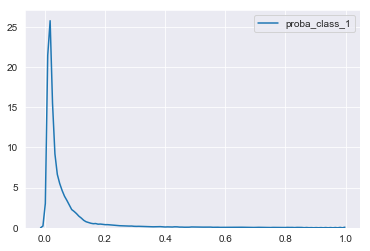

<Figure size 432x288 with 0 Axes>

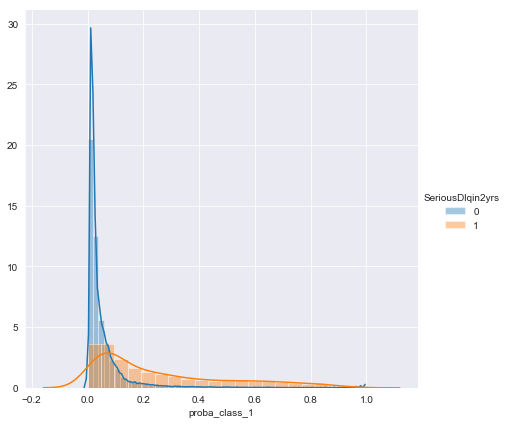

In [178]:
modelDiagnosis(x_test_select, y_test, logreg_select)

## modelDiagnosis :: Feature Selection - Backward Elimination

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


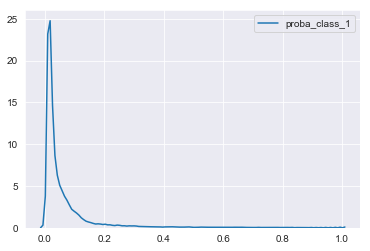

<Figure size 432x288 with 0 Axes>

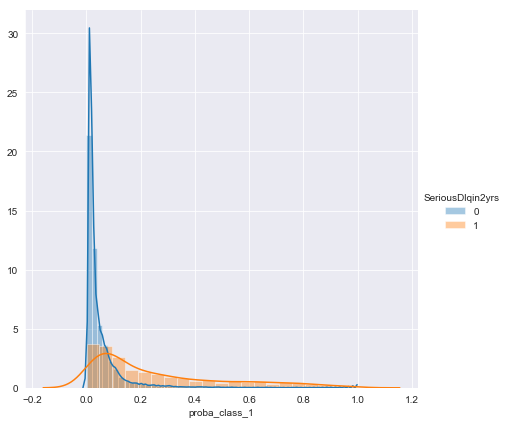

In [179]:
modelDiagnosis(x_test_backward, y_test, logreg_backward)

# Balanced Weight

In [180]:
y_train.value_counts(normalize=True)

0    0.932606
1    0.067394
Name: SeriousDlqin2yrs, dtype: float64

### balanced-Logistic Regression

In [181]:
# fitting logistic Regression, dengan memberi bobot pada tiap kelas
# agar balanced
logreg_balanced = LogisticRegression(class_weight='balanced',
                                    random_state=123)

In [182]:
logreg_balanced.fit(x_train_clean, y_train)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=123,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [183]:
logreg_balanced.score(x_train_clean, y_train)

0.8080915362851763

In [184]:
logreg_balanced.score(x_test_clean, y_test)

0.8062546856592053

In [185]:
print(classification_report(y_test, logreg_balanced.predict(x_test_clean)))

              precision    recall  f1-score   support

           0       0.98      0.81      0.89     34890
           1       0.22      0.74      0.34      2458

   micro avg       0.81      0.81      0.81     37348
   macro avg       0.60      0.78      0.61     37348
weighted avg       0.93      0.81      0.85     37348



## modelDiagnosis :: balanced-Logistic Regression

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


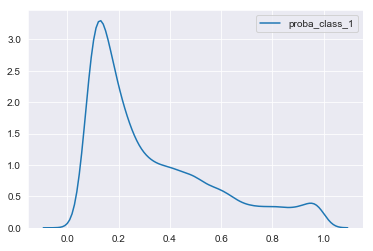

<Figure size 432x288 with 0 Axes>

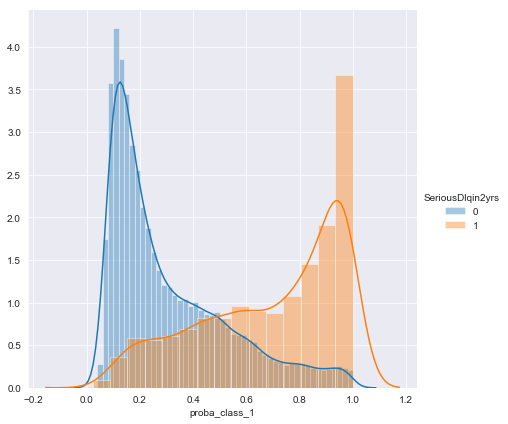

In [186]:
modelDiagnosis(x_test_clean, y_test, logreg_balanced)

# Predict

In [187]:
# mengambil sebagian data untuk prediksi
data_predict = x_test_clean.head(5)
data_predict.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,...,NumberOfTime30-59DaysPastDueNotWorse_log_square,DebtRatio_log_square,MonthlyIncome_log_square,NumberOfTimes90DaysLate_log_square,NumberRealEstateLoansOrLines_log_square,NumberOfTime60-89DaysPastDueNotWorse_log_square,DependentsClass_0-4,DependentsClass_10>,DependentsClass_5-9,DependentsClass_KOSONG
38843,-0.019440,0.792595,0.151134,-0.215724,-0.431761,-1.262694,-0.062835,-0.909634,-0.056161,-0.669173,...,0.809793,-0.439134,-1.323952,-0.178479,-0.970458,-0.181904,1,0,0,0
41287,-0.020237,0.520733,-0.101741,-0.215458,-0.166449,0.292460,-0.062835,-0.022580,-0.056161,-0.669173,...,-0.327208,-0.428569,-0.116456,-0.178479,-0.069142,-0.181904,1,0,0,0
121098,-0.021958,-0.974505,-0.101741,-0.215590,-0.335645,1.070037,-0.062835,-0.022580,-0.056161,0.234306,...,-0.327208,-0.434649,-0.755070,-0.178479,-0.069142,-0.181904,1,0,0,0
89832,-0.020325,1.676145,-0.101741,-0.215529,0.281068,0.681248,-0.062835,0.864475,-0.056161,-0.669173,...,-0.327208,-0.431995,0.841889,-0.178479,1.293743,-0.181904,1,0,0,0
72014,-0.022457,1.608179,-0.101741,-0.215532,-0.278463,0.292460,-0.062835,0.864475,-0.056161,-0.669173,...,-0.327208,-0.432161,-0.504756,-0.178479,1.293743,-0.181904,1,0,0,0


In [188]:
# predict kelas
logreg_balanced.predict(data_predict)

array([1, 0, 0, 0, 0], dtype=int64)

In [189]:
# predict probability untuk tiap observarsi
logreg_balanced.predict_proba(data_predict)

array([[0.30882888, 0.69117112],
       [0.58213879, 0.41786121],
       [0.62142954, 0.37857046],
       [0.65597292, 0.34402708],
       [0.83138052, 0.16861948]])

In [190]:
score = logreg_balanced.predict_proba(data_predict)

# menampilkan scoring untuk tiap observasi
for i in range(0, data_predict.shape[0]):
    # karena kelas not default pada kelas 0
    # ambil score[index_observasi][kelas]*1000
    print(score[i][0]*1000)

308.8288779718348
582.1387859993234
621.4295441223893
655.9729194073236
831.3805153520643


# Save to csv

In [191]:
# data test asli
x_test.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,DependentsClass
38843,1.000000,64,1,0.183262,1636.0,2,0,0,0,0.0,0-4
41287,0.784246,60,0,0.617184,4573.0,10,0,1,0,0.0,0-4
121098,0.318128,38,0,0.402444,2700.0,14,0,1,0,1.0,0-4
89832,0.760359,77,0,0.501679,9527.0,12,0,2,0,0.0,0-4
72014,0.183286,76,0,0.495801,3333.0,10,0,2,0,0.0,0-4


In [192]:
# predict proba untuk data test(clean)
proba_test = logreg_balanced.predict_proba(x_test_clean)

In [193]:
score_test = []
for i in range(0, proba_test.shape[0]):
    score_test.append(proba_test[i][0]*1000)

In [194]:
# menyimpan score ke dalam DataFrame
score_test_df = pd.DataFrame(score_test, index=x_test.index, columns=['Score'])
score_test_df.head()

,Score
38843,308.828878
41287,582.138786
121098,621.429544
89832,655.972919
72014,831.380515


In [195]:
# menggabungkan dengan kolom data asli
test_predict = pd.concat([x_test, score_test_df], axis = 1)
test_predict.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,DependentsClass,Score
38843,1.000000,64,1,0.183262,1636.0,2,0,0,0,0.0,0-4,308.828878
41287,0.784246,60,0,0.617184,4573.0,10,0,1,0,0.0,0-4,582.138786
121098,0.318128,38,0,0.402444,2700.0,14,0,1,0,1.0,0-4,621.429544
89832,0.760359,77,0,0.501679,9527.0,12,0,2,0,0.0,0-4,655.972919
72014,0.183286,76,0,0.495801,3333.0,10,0,2,0,0.0,0-4,831.380515


In [196]:
# simpan ke csv
test_predict.to_csv('predict_test_result.csv')